In [1]:
%matplotlib inline
#!pip install python-dotenv
#!pip install pydot
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

import utils

plt.rcParams['figure.figsize'] = (17, 5)

In [2]:
tracks = utils.load('data/fma_metadata/tracks.csv')

tracks.shape

(106574, 52)

In [3]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   (album, comments)            106574 non-null  int64         
 1   (album, date_created)        103045 non-null  datetime64[ns]
 2   (album, date_released)       70294 non-null   datetime64[ns]
 3   (album, engineer)            15295 non-null   object        
 4   (album, favorites)           106574 non-null  int64         
 5   (album, id)                  106574 non-null  int64         
 6   (album, information)         83149 non-null   category      
 7   (album, listens)             106574 non-null  int64         
 8   (album, producer)            18060 non-null   object        
 9   (album, tags)                106574 non-null  object        
 10  (album, title)               105549 non-null  object        
 11  (album, tracks)           

In [4]:
smallSet=tracks.loc[tracks[('set','subset')] == 'small']

In [5]:
track=smallSet['track']
album=smallSet['album']
artist=smallSet['artist']
sette=smallSet['set']

In [6]:
smallSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2 to 155066
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   (album, comments)            8000 non-null   int64         
 1   (album, date_created)        8000 non-null   datetime64[ns]
 2   (album, date_released)       5337 non-null   datetime64[ns]
 3   (album, engineer)            1142 non-null   object        
 4   (album, favorites)           8000 non-null   int64         
 5   (album, id)                  8000 non-null   int64         
 6   (album, information)         6502 non-null   category      
 7   (album, listens)             8000 non-null   int64         
 8   (album, producer)            1404 non-null   object        
 9   (album, tags)                8000 non-null   object        
 10  (album, title)               8000 non-null   object        
 11  (album, tracks)              8000 non-nul

In [7]:
track.head()

,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,
2,256000,0,NaN,2008-11-26 01:48:12,2008-11-26,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
5,256000,0,NaN,2008-11-26 01:48:20,2008-11-26,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
10,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
140,128000,0,NaN,2008-11-26 01:44:07,2008-11-26,253,5,Folk,[17],[17],NaN,1593,en,Attribution-Noncommercial-No Derivative Works ...,1299,NaN,2,NaN,[],Queen Of The Wires
141,128000,0,NaN,2008-11-26 01:44:10,2008-11-26,182,1,Folk,[17],[17],NaN,839,en,Attribution-Noncommercial-No Derivative Works ...,725,NaN,4,NaN,[],Ohio


In [8]:
track.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2 to 155066
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   bit_rate       8000 non-null   int64         
 1   comments       8000 non-null   int64         
 2   composer       180 non-null    object        
 3   date_created   8000 non-null   datetime64[ns]
 4   date_recorded  465 non-null    datetime64[ns]
 5   duration       8000 non-null   int64         
 6   favorites      8000 non-null   int64         
 7   genre_top      8000 non-null   category      
 8   genres         8000 non-null   object        
 9   genres_all     8000 non-null   object        
 10  information    159 non-null    object        
 11  interest       8000 non-null   int64         
 12  language_code  1005 non-null   object        
 13  license        7995 non-null   category      
 14  listens        8000 non-null   int64         
 15  lyricist       26 n

In [9]:
track['license'].value_counts()

Attribution-Noncommercial-Share Alike 3.0 United States                          1233
Attribution-NonCommercial-NoDerivatives (aka Music Sharing) 3.0 International     998
Creative Commons Attribution-NonCommercial-NoDerivatives 4.0                      967
Attribution-NonCommercial-ShareAlike 3.0 International                            913
Attribution-Noncommercial-No Derivative Works 3.0 United States                   696
                                                                                 ... 
Attribution-Noncommercial-No Derivative Works 3.0 Croatia                           0
Attribution-Noncommercial-No Derivative Works 3.0 Netherlands                       0
Attribution-Noncommercial-NoDerivatives 2.0 Belgium                                 0
Attribution-Noncommercial-NoDerivatives 2.0 Generic                                 0
Attribution-Noncommercial-No Derivative Works 2.5 Portugal                          0
Name: license, Length: 113, dtype: int64

In [10]:
track['genre_top'].value_counts()

Rock                   1000
Pop                    1000
International          1000
Instrumental           1000
Hip-Hop                1000
Folk                   1000
Experimental           1000
Electronic             1000
Spoken                    0
Soul-RnB                  0
Old-Time / Historic       0
Jazz                      0
Easy Listening            0
Country                   0
Classical                 0
Blues                     0
Name: genre_top, dtype: int64

In [11]:
album.head()

,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type
track_id,,,,,,,,,,,,,
2,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
5,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
10,0,2008-11-26 01:45:08,2008-02-06,NaN,4,6,NaN,47632,NaN,[],Constant Hitmaker,2,Album
140,1,2008-11-26 01:49:59,2007-05-22,NaN,1,61,<p>Alec K. Redfearn &amp; The Eyesores: Ellen ...,1300,"Alec K. Refearn, Rob Pemberton",[],The Blind Spot,1,Album
141,0,2008-11-26 01:49:57,2009-01-16,NaN,1,60,"<p>A full ensamble of strings, drums, electron...",1304,NaN,[],Every Man For Himself,2,Album


In [12]:
album.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2 to 155066
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   comments       8000 non-null   int64         
 1   date_created   8000 non-null   datetime64[ns]
 2   date_released  5337 non-null   datetime64[ns]
 3   engineer       1142 non-null   object        
 4   favorites      8000 non-null   int64         
 5   id             8000 non-null   int64         
 6   information    6502 non-null   category      
 7   listens        8000 non-null   int64         
 8   producer       1404 non-null   object        
 9   tags           8000 non-null   object        
 10  title          8000 non-null   object        
 11  tracks         8000 non-null   int64         
 12  type           7769 non-null   category      
dtypes: category(2), datetime64[ns](2), int64(5), object(4)
memory usage: 1.2+ MB


In [13]:
album['type'].value_counts()

Album               6784
Radio Program        472
Live Performance     432
Single Tracks         81
Contest                0
Name: type, dtype: int64

In [14]:
album['title'].value_counts()

Live at the 2014 Golden Festival                                      50
Carcrashlander Instrumentals                                          36
It's A 6th Sense Beat Yo!!                                            33
This Is The End, Beautiful Friend                                     29
Massive Exposure [LCL19]                                              28
                                                                      ..
Live at WFMU on What Was Music? with Marcel M, 10/19/16                1
Live at WFMU on Terre T's Cherry Blossom Clinic                        1
Live at WFMU's SXSW Showcase at Spiro's in Austin, TX on 3/14/2008     1
Ecozoic                                                                1
The American Ice Age - MMXIII                                          1
Name: title, Length: 2417, dtype: int64

In [15]:
artist.head()

,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page
track_id,,,,,,,,,,,,,,,,,
2,2006-01-01,NaT,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,[awol],http://www.AzillionRecords.blogspot.com,NaN
5,2006-01-01,NaT,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,[awol],http://www.AzillionRecords.blogspot.com,NaN
10,NaT,NaT,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3,2008-11-26 01:42:55,74,6,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"[philly, kurt vile]",http://kurtvile.com,NaN
140,1999-01-01,NaT,NaN,<p>The Eyesores originally formed in 1997 orig...,0,2008-11-26 01:47:44,11,54,41.823989,"Providence, RI",-71.412834,NaN,Alec K. Redfearn & the Eyesores,"Haldols, Amoebic Ensemble, Mr. Gutter",[alec k redfearn and the eyesores],http://www.aleckredfearn.com,http://en.wikipedia.org/wiki/Alec_K_Redfearn
141,1999-01-01,NaT,NaN,<p>The Eyesores originally formed in 1997 orig...,0,2008-11-26 01:47:44,11,54,41.823989,"Providence, RI",-71.412834,NaN,Alec K. Redfearn & the Eyesores,"Haldols, Amoebic Ensemble, Mr. Gutter",[alec k redfearn and the eyesores],http://www.aleckredfearn.com,http://en.wikipedia.org/wiki/Alec_K_Redfearn


In [16]:
artist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2 to 155066
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   active_year_begin  1542 non-null   datetime64[ns]
 1   active_year_end    358 non-null    datetime64[ns]
 2   associated_labels  849 non-null    object        
 3   bio                5914 non-null   category      
 4   comments           8000 non-null   int64         
 5   date_created       8000 non-null   datetime64[ns]
 6   favorites          8000 non-null   int64         
 7   id                 8000 non-null   int64         
 8   latitude           2899 non-null   float64       
 9   location           5471 non-null   object        
 10  longitude          2899 non-null   float64       
 11  members            3525 non-null   object        
 12  name               8000 non-null   object        
 13  related_projects   694 non-null    object        
 14  tags  

In [17]:
artist['name'].value_counts()

Blue Dot Sessions                                         208
Big Blood                                                  91
The Impossebulls                                           68
Squire Tuck                                                56
Kellee Maize                                               55
                                                         ... 
Salome Lego Playset - Susanna Laterza - Kenji Siratori      1
Big Bang Boom                                               1
Ghost Bees                                                  1
.crk                                                        1
The Bran Flakes                                             1
Name: name, Length: 2306, dtype: int64

In [18]:
DBMERGE= pd.merge(artist['name'], album['title'], left_index=True, right_index=True)
DBMERGE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2 to 155066
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    8000 non-null   object
 1   title   8000 non-null   object
dtypes: object(2)
memory usage: 507.5+ KB


In [19]:
DBMERGE= pd.merge(DBMERGE, album['type'], left_index=True, right_index=True)
DBMERGE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2 to 155066
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   name    8000 non-null   object  
 1   title   8000 non-null   object  
 2   type    7769 non-null   category
dtypes: category(1), object(2)
memory usage: 515.5+ KB


In [20]:
DBMERGE= pd.merge(DBMERGE, track['genre_top'], left_index=True, right_index=True)
DBMERGE.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2 to 155066
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   name       8000 non-null   object  
 1   title      8000 non-null   object  
 2   type       7769 non-null   category
 3   genre_top  8000 non-null   category
dtypes: category(2), object(2)
memory usage: 524.1+ KB


In [21]:
DBMERGE= pd.merge(DBMERGE, track['license'], left_index=True, right_index=True)
DBMERGE.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2 to 155066
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   name       8000 non-null   object  
 1   title      8000 non-null   object  
 2   type       7769 non-null   category
 3   genre_top  8000 non-null   category
 4   license    7995 non-null   category
dtypes: category(3), object(2)
memory usage: 537.8+ KB


In [22]:
DBMERGE.head()

,name,title,type,genre_top,license
track_id,,,,,
2,AWOL,AWOL - A Way Of Life,Album,Hip-Hop,Attribution-NonCommercial-ShareAlike 3.0 Inter...
5,AWOL,AWOL - A Way Of Life,Album,Hip-Hop,Attribution-NonCommercial-ShareAlike 3.0 Inter...
10,Kurt Vile,Constant Hitmaker,Album,Pop,Attribution-NonCommercial-NoDerivatives (aka M...
140,Alec K. Redfearn & the Eyesores,The Blind Spot,Album,Folk,Attribution-Noncommercial-No Derivative Works ...
141,Alec K. Redfearn & the Eyesores,Every Man For Himself,Album,Folk,Attribution-Noncommercial-No Derivative Works ...


In [23]:
DBMERGE['Artist_Name']=DBMERGE['name']


In [24]:
DBMERGE['Album_Title']=DBMERGE['title']

In [25]:
DBMERGE['Album_type']=DBMERGE['type']

In [26]:
DBMERGE['Track_licence']=DBMERGE['license']

In [27]:
DBMERGE=DBMERGE.drop(['title','name','type','license'], axis = 1)


In [28]:
DBMERGE.head()

,genre_top,Artist_Name,Album_Title,Album_type,Track_licence
track_id,,,,,
2,Hip-Hop,AWOL,AWOL - A Way Of Life,Album,Attribution-NonCommercial-ShareAlike 3.0 Inter...
5,Hip-Hop,AWOL,AWOL - A Way Of Life,Album,Attribution-NonCommercial-ShareAlike 3.0 Inter...
10,Pop,Kurt Vile,Constant Hitmaker,Album,Attribution-NonCommercial-NoDerivatives (aka M...
140,Folk,Alec K. Redfearn & the Eyesores,The Blind Spot,Album,Attribution-Noncommercial-No Derivative Works ...
141,Folk,Alec K. Redfearn & the Eyesores,Every Man For Himself,Album,Attribution-Noncommercial-No Derivative Works ...


In [29]:
DBMERGE=DBMERGE.dropna(axis=0)

In [30]:
DBMERGE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7764 entries, 2 to 155066
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   genre_top      7764 non-null   category
 1   Artist_Name    7764 non-null   object  
 2   Album_Title    7764 non-null   object  
 3   Album_type     7764 non-null   category
 4   Track_licence  7764 non-null   category
dtypes: category(3), object(2)
memory usage: 211.5+ KB


In [31]:
DBMERGE['Album_Title'].value_counts()

Live at the 2014 Golden Festival     44
Carcrashlander Instrumentals         36
It's A 6th Sense Beat Yo!!           33
This Is The End, Beautiful Friend    29
Massive Exposure [LCL19]             28
                                     ..
Parias in the Woods                   1
Mental Fragments                      1
Da Interview EP                       1
Neurim                                1
The Big Numbers                       1
Name: Album_Title, Length: 2359, dtype: int64

In [32]:
df=DBMERGE.copy()

In [33]:
df

,genre_top,Artist_Name,Album_Title,Album_type,Track_licence
track_id,,,,,
2,Hip-Hop,AWOL,AWOL - A Way Of Life,Album,Attribution-NonCommercial-ShareAlike 3.0 Inter...
5,Hip-Hop,AWOL,AWOL - A Way Of Life,Album,Attribution-NonCommercial-ShareAlike 3.0 Inter...
10,Pop,Kurt Vile,Constant Hitmaker,Album,Attribution-NonCommercial-NoDerivatives (aka M...
140,Folk,Alec K. Redfearn & the Eyesores,The Blind Spot,Album,Attribution-Noncommercial-No Derivative Works ...
141,Folk,Alec K. Redfearn & the Eyesores,Every Man For Himself,Album,Attribution-Noncommercial-No Derivative Works ...
...,...,...,...,...,...
154308,Hip-Hop,Fleslit,Journey,Album,Attribution
154309,Hip-Hop,Fleslit,Journey,Album,Attribution
154413,Pop,Tasseomancy,Live at WFMU for Dark Night of the Soul wtih J...,Live Performance,Creative Commons Attribution-NonCommercial-NoD...


## K MODES

In [22]:
!pip install kmodes

You should consider upgrading via the 'c:\users\federico\anaconda3\python.exe -m pip install --upgrade pip' command.


In [35]:
from kmodes.kmodes import KModes

In [67]:
km = KModes(n_clusters=4, init='Huang', max_iter =100, n_init=5, verbose=1,random_state=0)

KModes

kmodes.kmodes.KModes

In [68]:
clusters = km.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1166, cost: 25903.0
Run 1, iteration: 2/100, moves: 13, cost: 25903.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2774, cost: 25128.0
Run 2, iteration: 2/100, moves: 0, cost: 25128.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1665, cost: 25106.0
Run 3, iteration: 2/100, moves: 4, cost: 25106.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 515, cost: 26531.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 355, cost: 25855.0
Best run was number 3


In [69]:
km.cluster_centroids_

array([['Folk', 'Blue Dot Sessions', 'Live at the 2014 Golden Festival',
        'Album',
        'Attribution-Noncommercial-Share Alike 3.0 United States'],
       ['International', 'Garmisch', 'CC Affiliates Mixtape #1', 'Album',
        'Attribution-NonCommercial-NoDerivatives (aka Music Sharing) 3.0 International'],
       ['Hip-Hop', 'The Impossebulls', "It's A 6th Sense Beat Yo!!",
        'Album', 'Attribution-NonCommercial-ShareAlike'],
       ['Electronic', 'Fierbinteanu', 'Massive Exposure [LCL19]',
        'Album',
        'Attribution-NonCommercial-ShareAlike 3.0 International']],
      dtype='<U77')

In [70]:
km.labels_

array([2, 2, 1, ..., 0, 0, 2], dtype=uint16)

In [71]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2, 3], dtype=uint16),
 array([4083, 1411, 1113, 1157], dtype=int64))

In [72]:
km.cost_ 

25106.0

In [74]:
df_binary=pd.get_dummies(df)

In [76]:
df_binary

,genre_top_Blues,genre_top_Classical,genre_top_Country,genre_top_Easy Listening,genre_top_Electronic,genre_top_Experimental,genre_top_Folk,genre_top_Hip-Hop,genre_top_Instrumental,genre_top_International,...,Track_licence_Free Music Philosophy,Track_licence_Music Sharing,Track_licence_Noncommercial Sampling Plus,Track_licence_Orphan Work,Track_licence_PennSound,Track_licence_Public Domain,Track_licence_Public Domain / Sound Recording Common Law Protection,Track_licence_Public Domain Mark 1.0,Track_licence_Sampling Plus,Track_licence_ideology.de
track_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154308,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
154309,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
154413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
dist=pairwise_distances(df_binary.values,metric='jaccard')

C:\Users\Federico\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [89]:
dist

array([[0.        , 0.        , 0.88888889, ..., 1.        , 1.        ,
        0.75      ],
       [0.        , 0.        , 0.88888889, ..., 1.        , 1.        ,
        0.75      ],
       [0.88888889, 0.88888889, 0.        , ..., 0.88888889, 0.88888889,
        0.88888889],
       ...,
       [1.        , 1.        , 0.88888889, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 0.88888889, ..., 0.        , 0.        ,
        1.        ],
       [0.75      , 0.75      , 0.88888889, ..., 1.        , 1.        ,
        0.        ]])

In [96]:
%%time
sse_list = list()
sil_list = list()

max_k = 500
for k in range(5, max_k,5):
    km = KModes(n_clusters=k, init='Huang', max_iter=100, n_init=3,random_state=0)
    clusters = km.fit_predict(df)
    sil=silhouette_score(dist, km.labels_,metric='precomputed')
    sse = km.cost_
    sse_list.append(sse)
    sil_list.append(sil)
    print('%d cluster: sse= %f sil= %f',k,sse,sil)
    
    

%d cluster: sse= %f sil= %f 5 24123.0 0.056867349738662795
%d cluster: sse= %f sil= %f 10 21800.0 0.04792965116158667
%d cluster: sse= %f sil= %f 15 20727.0 0.06051080411582884
%d cluster: sse= %f sil= %f 20 20715.0 0.03607781561610939
%d cluster: sse= %f sil= %f 25 19605.0 0.05526216363073419
%d cluster: sse= %f sil= %f 30 19468.0 0.05249355719180342
%d cluster: sse= %f sil= %f 35 18583.0 0.06393540282726574
%d cluster: sse= %f sil= %f 40 18812.0 0.06339444036200646
%d cluster: sse= %f sil= %f 45 17969.0 0.10065341435628307
%d cluster: sse= %f sil= %f 50 17576.0 0.09206406330246165
%d cluster: sse= %f sil= %f 55 17795.0 0.09130046522056005
%d cluster: sse= %f sil= %f 60 17159.0 0.1031927193112542
%d cluster: sse= %f sil= %f 65 17165.0 0.09205430046217594
%d cluster: sse= %f sil= %f 70 16868.0 0.10426089162849735
%d cluster: sse= %f sil= %f 75 16684.0 0.10538359415863383
%d cluster: sse= %f sil= %f 80 16327.0 0.12394593008087118
%d cluster: sse= %f sil= %f 85 15928.0 0.1247675451210557

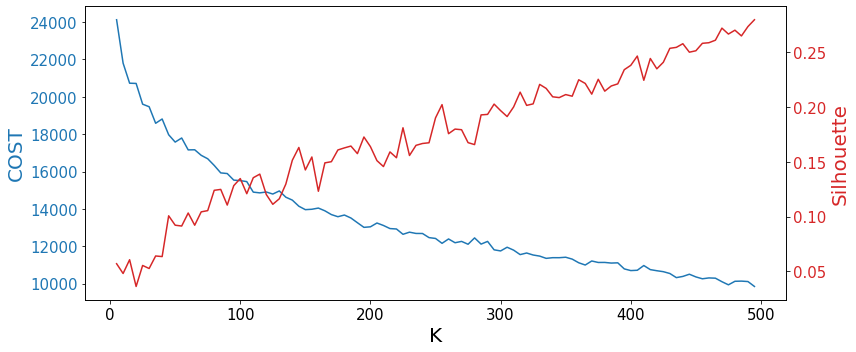

In [97]:
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)   # fontsize of the tick labels
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
fig, ax1 = plt.subplots(figsize=(12, 5))
t = np.arange(5, 500, 5)
color = 'tab:blue'
ax1.set_xlabel('K')
ax1.set_ylabel('COST', color=color)
ax1.plot(t, sse_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(t, sil_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [36]:
km = KModes(n_clusters=9, init='Huang', max_iter=200, n_init=5,random_state=0)
clusters = km.fit_predict(df)

In [37]:
km.cost_ 

22214.0

In [100]:
silhouette_score(dist, km.labels_,metric='precomputed')


0.19014265417412302

In [38]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=uint16),
 array([1622, 1327, 1022, 1107,  758,  427,  394,  592,  515], dtype=int64))

In [39]:
km.labels_

array([1, 1, 0, ..., 0, 0, 3], dtype=uint16)

In [40]:
df['cluster']=km.labels_

In [41]:
zero=df.loc[df['cluster']==0]

In [42]:
zero['genre_top'].value_counts()

Pop                    915
Instrumental           473
Electronic              81
Hip-Hop                 57
Experimental            34
Folk                    29
Rock                    26
International            7
Spoken                   0
Soul-RnB                 0
Old-Time / Historic      0
Jazz                     0
Easy Listening           0
Country                  0
Classical                0
Blues                    0
Name: genre_top, dtype: int64

In [44]:
df.head()

,genre_top,Artist_Name,Album_Title,Album_type,Track_licence,cluster
track_id,,,,,,
2,Hip-Hop,AWOL,AWOL - A Way Of Life,Album,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1
5,Hip-Hop,AWOL,AWOL - A Way Of Life,Album,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1
10,Pop,Kurt Vile,Constant Hitmaker,Album,Attribution-NonCommercial-NoDerivatives (aka M...,0
140,Folk,Alec K. Redfearn & the Eyesores,The Blind Spot,Album,Attribution-Noncommercial-No Derivative Works ...,5
141,Folk,Alec K. Redfearn & the Eyesores,Every Man For Himself,Album,Attribution-Noncommercial-No Derivative Works ...,5


In [43]:
km.cluster_centroids_

array([['Pop', 'TRG Banks', 'Carcrashlander Instrumentals', 'Album',
        'Attribution-NonCommercial 3.0 International'],
       ['Rock', 'Scott Holmes', 'Drop a 4 note Soundtrack', 'Album',
        'Attribution-NonCommercial-ShareAlike 3.0 International'],
       ['Experimental', 'Blue Dot Sessions',
        'This Is The End, Beautiful Friend', 'Album',
        'Attribution-NonCommercial'],
       ['Hip-Hop', 'The Impossebulls', '#JustBecause', 'Album',
        'Attribution-NonCommercial-ShareAlike'],
       ['Electronic', 'Jason Shaw', 'Audionautix: Tech, Urban, Dance',
        'Album',
        'Attribution-NonCommercial-ShareAlike 3.0 International'],
       ['Folk', 'Alash Ensemble',
        "Live on WFMU's Transpacific Sound Paradise, Jan 22, 2011",
        'Radio Program',
        'Attribution-Noncommercial-No Derivative Works 3.0 United States'],
       ['International', 'The Sounds of Taraab',
        'Live at the 2013 Golden Festival', 'Live Performance',
        'Attributi

In [18]:
features = pd.read_csv('data/fma_metadata/df_senzaOutliers.csv',index_col=[0], header=[0,1,2])

features

feature    chroma_stft       mfcc                                    \
statistics        mean        max                                     
number              01         01         03          04         07   
track_id                                                              
2             0.696063  28.657707  52.424423  103.289833  37.843021   
3             0.449602  29.380682  76.742714  137.245010  55.662521   
5             0.481160 -40.500740  50.373932  112.312531  29.266182   
10            0.388109  20.196968  60.412815   78.466721  21.597277   
134           0.438062 -41.723225  58.687328  125.922821  37.450359   
...                ...        ...        ...         ...        ...   
155297        0.408626   3.826046  94.208336   48.085751  26.723190   
155298        0.439034 -72.790154  81.013275  124.569000  29.571426   
155306        0.369401  -7.814734  88.024063  116.180260  29.388819   
155307        0.357939 -13.889938  62.219879   93.028778  41.311356   
155314        0.551894 -15.305521  32.737503   95.054657  25.620636   

feature                                                                ...  \
statistics                   mean           min                        ...   
number             11          02            02         04         05  ...   
track_id                                                               ...   
2           27.737400  116.696678 -1.421085e-14 -51.569004 -97.879890  ...   
3           26.740063  120.158501 -1.851665e+01 -12.548506 -87.048355  ...   
5           27.197964  132.215073 -6.228398e+01 -24.319845 -74.060310  ...   
10          24.780317  157.040085  5.151435e-14 -50.578659 -45.113949  ...   
134         36.486378  125.521309 -9.427860e-01 -90.334747 -67.671829  ...   
...               ...         ...           ...        ...        ...  ...   
155297      19.866936  163.954620 -1.776357e-14 -29.221125 -28.104187  ...   
155298      38.472843  160.770218 -7.993606e-14  -7.314378 -69.236115  ...   
155306      47.185654  177.614151  5.329071e-15 -49.451691 -70.841232  ...   
155307      33.690544  124.228142 -5.892177e+00 -50.547176 -99.119080  ...   
155314      34.402496  166.692734 -2.464827e-01 -55.172737 -55.477066  ...   

feature                          spectral_bandwidth spectral_contrast  \
statistics        std                      kurtosis               max   
number             02         04                 01                03   
track_id                                                                
2           38.569584  20.767921           3.874384         39.333603   
3           41.191982  22.025253           2.383340         42.141411   
5           39.367599  24.319347           0.895442         39.017235   
10          44.409843  14.013119           0.437628         45.410881   
134         47.266518  36.841534           0.372903         41.526760   
...               ...        ...                ...               ...   
155297      30.287067  12.060067          20.706787         40.720093   
155298      39.359367  18.604885           5.868375         39.627396   
155306      40.537926  28.671246           4.375974         40.628235   
155307      35.382370  22.123117          -0.383395         48.715477   
155314      26.786989  22.369673           0.011010         39.460281   

feature                           tonnetz metadata                              
statistics                  min       std      set         track                
number             04        02        01   subset     genre_top genre_top_Cat  
track_id                                                                        
2           31.513493  2.296826  0.019809    small       Hip-Hop             7  
3           31.473713  0.652681  0.026316   medium       Hip-Hop             7  
5           33.707951  2.314010  0.025550    small       Hip-Hop             7  
10          28.711344  4.415900  0.021413    small           Pop            12  
134         32.2243

In [19]:
attributes = [col for col in features.columns if (col != ('metadata','track','genre_top') and 
                                                  col != ('metadata','set','subset')  and
                                                 col != ('metadata','track','genre_top_Cat'))] 
attributes

[('chroma_stft', 'mean', '01'),
 ('mfcc', 'max', '01'),
 ('mfcc', 'max', '03'),
 ('mfcc', 'max', '04'),
 ('mfcc', 'max', '07'),
 ('mfcc', 'max', '11'),
 ('mfcc', 'mean', '02'),
 ('mfcc', 'min', '02'),
 ('mfcc', 'min', '04'),
 ('mfcc', 'min', '05'),
 ('mfcc', 'min', '11'),
 ('mfcc', 'skew', '04'),
 ('mfcc', 'std', '01'),
 ('mfcc', 'std', '02'),
 ('mfcc', 'std', '04'),
 ('spectral_bandwidth', 'kurtosis', '01'),
 ('spectral_contrast', 'max', '03'),
 ('spectral_contrast', 'max', '04'),
 ('spectral_contrast', 'min', '02'),
 ('tonnetz', 'std', '01')]

In [20]:
for i in attributes:
    features[i]=pd.cut(features[i],5)

In [21]:
features

feature        chroma_stft               mfcc                     \
statistics            mean                max                      
number                  01                 01                 03   
track_id                                                           
2           (0.597, 0.782]  (-95.141, 42.245]   (16.675, 63.986]   
3           (0.412, 0.597]  (-95.141, 42.245]  (63.986, 111.297]   
5           (0.412, 0.597]  (-95.141, 42.245]   (16.675, 63.986]   
10          (0.228, 0.412]  (-95.141, 42.245]   (16.675, 63.986]   
134         (0.412, 0.597]  (-95.141, 42.245]   (16.675, 63.986]   
...                    ...                ...                ...   
155297      (0.228, 0.412]  (-95.141, 42.245]  (63.986, 111.297]   
155298      (0.412, 0.597]  (-95.141, 42.245]  (63.986, 111.297]   
155306      (0.228, 0.412]  (-95.141, 42.245]  (63.986, 111.297]   
155307      (0.228, 0.412]  (-95.141, 42.245]   (16.675, 63.986]   
155314      (0.412, 0.597]  (-95.141, 42.245]   (16.675, 63.986]   

feature                                                             \
statistics                                                           
number                      04                07                11   
track_id                                                             
2             (77.24, 117.224]   (20.99, 44.417]  (18.244, 36.489]   
3           (117.224, 157.209]  (44.417, 67.844]  (18.244, 36.489]   
5             (77.24, 117.224]   (20.99, 44.417]  (18.244, 36.489]   
10            (77.24, 117.224]   (20.99, 44.417]  (18.244, 36.489]   
134         (117.224, 157.209]   (20.99, 44.417]  (18.244, 36.489]   
...                        ...               ...               ...   
155297         (37.256, 77.24]   (20.99, 44.417]  (18.244, 36.489]   
155298      (117.224, 157.209]   (20.99, 44.417]  (36.489, 54.733]   
155306        (77.24, 117.224]   (20.99, 44.417]  (36.489, 54.733]   
155307        (77.24, 117.224]   (20.99, 44.417]  (18.244, 36.489]   
155314        (77.24, 117.224]   (20.99, 44.417]  (18.244, 36.489]   

feature                                                                 \
statistics                mean                 min                       
number                      02                  02                  04   
track_id                                                                 
2            (71.566, 120.867]    (-56.95, 12.459]  (-57.824, -20.048]   
3            (71.566, 120.867]    (-56.95, 12.459]   (-20.048, 17.729]   
5           (120.867, 170.168]  (-126.359, -56.95]  (-57.824, -20.048]   
10          (120.867, 170.168]    (-56.95, 12.459]  (-57.824, -20.048]   
134         (120.867, 170.168]    (-56.95, 12.459]  (-95.601, -57.824]   
...                        ...                 ...                 ...   
155297      (120.867, 170.168]    (-56.95, 12.459]  (-57.824, -20.048]   
155298      (120.867, 170.168]    (-56.95, 12.459]   (-20.048, 17.729]   
155306      (170.168, 219.468]    (-56.95, 12.459]  (-57.824, -20.048]   
155307      (120.867, 170.168]    (-56.95, 12.459]  (-57.824, -20.048]   
155314      (120.867, 170.168]    (-56.95, 12.459]  (-57.824, -20.048]   

feature                          ...                                      \
statistics                       ...               std                     
number                       05  ...                02                04   
track_id                         ...                                       
2           (-117.783, -87.274]  ...  (22.405, 39.459]   (14.59, 24.967]   
3            (-87.274, -56.764]  ...  (39.459, 56.513]   (14.59, 24.967]   
5            (-87.274, -56.764]  ...  (22.405, 39.459]   (14.59, 24.967]   
10           (-56.764, -26.255]  ...  (39.459, 56.513]    (4.161, 14.59]   
134          (-87.274, -56.764]  ...  (39.459, 56.513]   (35.343, 45.72]   
...                         ...  ...               ...               ...   
155297       (-56.764, -26.255]  ...  (22.405, 39.459]   

kmodes.kmodes.KModes

In [26]:
km = KModes(n_clusters=10, init='Huang', max_iter=200, n_init=5,random_state=0)
clusters = km.fit_predict(features[attributes])


In [27]:
km.cluster_centroids_

array([[Interval(0.412, 0.597, closed='right'),
        Interval(-95.141, 42.245, closed='right'),
        Interval(63.986, 111.297, closed='right'),
        Interval(37.256, 77.24, closed='right'),
        Interval(20.99, 44.417, closed='right'),
        Interval(18.244, 36.489, closed='right'),
        Interval(120.867, 170.168, closed='right'),
        Interval(-56.95, 12.459, closed='right'),
        Interval(-57.824, -20.048, closed='right'),
        Interval(-56.764, -26.255, closed='right'),
        Interval(-47.589, -23.794, closed='right'),
        Interval(-0.967, 0.387, closed='right'),
        Interval(49.276, 88.769, closed='right'),
        Interval(22.405, 39.459, closed='right'),
        Interval(14.59, 24.967, closed='right'),
        Interval(-2.198, 78.135, closed='right'),
        Interval(42.91, 50.92, closed='right'),
        Interval(37.623, 46.003, closed='right'),
        Interval(1.734, 3.468, closed='right'),
        Interval(0.0127, 0.0265, closed='right')],

In [28]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint16),
 array([2302, 1377, 3734, 1832, 2504, 2876, 3430, 2899, 2078, 1720],
       dtype=int64))

In [29]:
km.cost_ 

138230.0

In [30]:
df_binary=pd.get_dummies(features[attributes])

In [32]:
from sklearn.metrics import silhouette_score

silhouette_score(df_binary, km.labels_)

0.026124694753004243

In [33]:
from sklearn.metrics import pairwise_distances
dist=pairwise_distances(df_binary.values,metric='jaccard')

C:\Users\Federico\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [34]:
silhouette_score(dist, km.labels_,metric='precomputed')

0.036631220217434264

## rock

In [79]:
Dataset=DBMERGE.copy()

In [80]:
from pyclustering.cluster import rock

In [86]:
aaa=pd.get_dummies(Dataset)

In [87]:
aaa

,genre_top_Blues,genre_top_Classical,genre_top_Country,genre_top_Easy Listening,genre_top_Electronic,genre_top_Experimental,genre_top_Folk,genre_top_Hip-Hop,genre_top_Instrumental,genre_top_International,...,Track_licence_Free Music Philosophy,Track_licence_Music Sharing,Track_licence_Noncommercial Sampling Plus,Track_licence_Orphan Work,Track_licence_PennSound,Track_licence_Public Domain,Track_licence_Public Domain / Sound Recording Common Law Protection,Track_licence_Public Domain Mark 1.0,Track_licence_Sampling Plus,Track_licence_ideology.de
track_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154308,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
154309,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
154413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [99]:
rc = rock.rock(aaa.values[:200], eps=1, number_clusters=4, threshold=0.5)
rc.process()

KeyboardInterrupt: 

In [95]:
clusters = rc.get_clusters()

In [97]:
len(clusters)

28

In [98]:
clusters

[[0, 1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24, 25, 26],
 [27],
 [28],
 [29],
 [30],
 [31, 32],
 [33, 34],
 [35],
 [36],
 [37],
 [38],
 [39, 40, 41, 42, 43, 44],
 [45],
 [46, 47, 48],
 [49]]